In [1]:
!pip install pandas geopandas plotly pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.9 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 1.csv to 1.csv
Saving ne_110m_admin_0_countries.cpg to ne_110m_admin_0_countries.cpg
Saving ne_110m_admin_0_countries.dbf to ne_110m_admin_0_countries.dbf
Saving ne_110m_admin_0_countries.prj to ne_110m_admin_0_countries.prj
Saving ne_110m_admin_0_countries.README.html to ne_110m_admin_0_countries.README.html
Saving ne_110m_admin_0_countries.shp to ne_110m_admin_0_countries.shp
Saving ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries.shx
Saving ne_110m_admin_0_countries.VERSION.txt to ne_110m_admin_0_countries.VERSION.txt
Saving tweetid_userid_keyword_topics_sentiments_emotions (5k sample).csv to tweetid_userid_keyword_topics_sentiments_emotions (5k sample).csv
Saving daily-new-confirmed-covid-19-cases-per-million-people.csv to daily-new-confirmed-covid-19-cases-per-million-people.csv


<ipython-input-3-e6e7cfd6cae6>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  topic_sentiment_counts = topic_melted.groupby(['Topic', 'sentiment_category']).size().reset_index(name='Count')


<ipython-input-3-e6e7cfd6cae6>:40: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



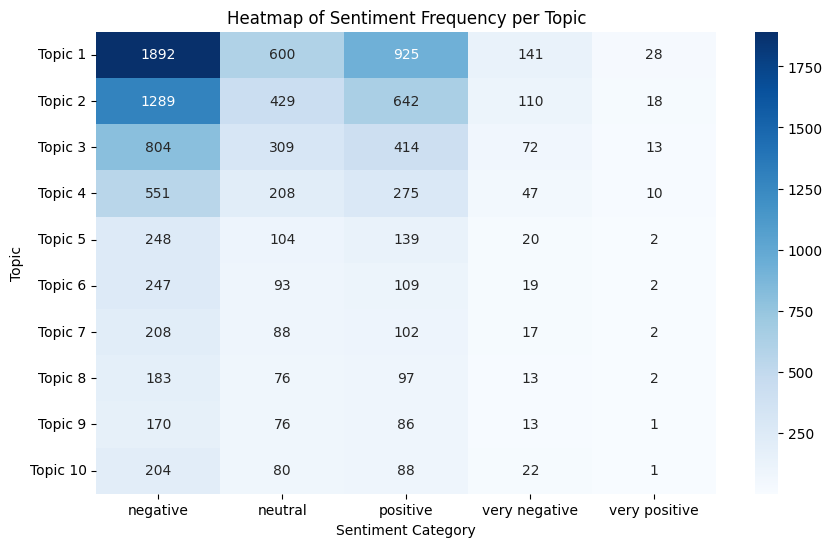

<ipython-input-3-e6e7cfd6cae6>:68: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



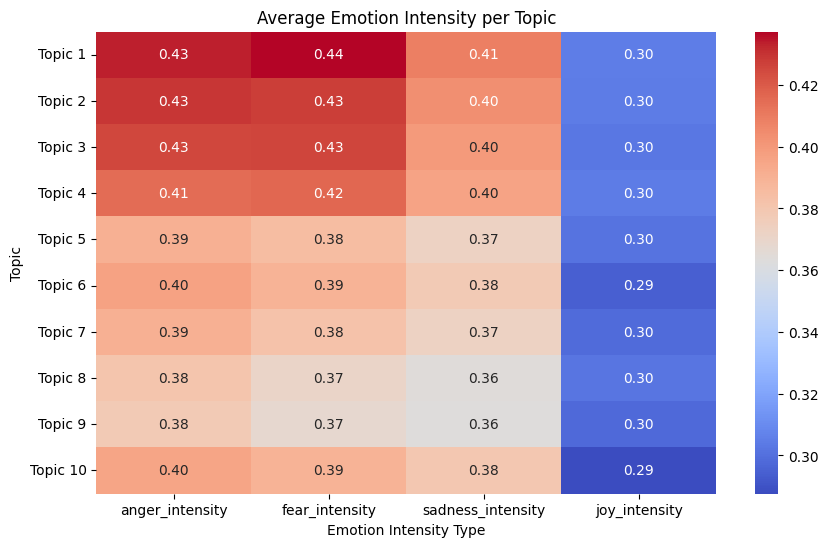

In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "tweetid_userid_keyword_topics_sentiments_emotions (5k sample).csv"
data = pd.read_csv(file_path)

# Extract topic columns
topic_columns = [f't{i}' for i in range(1, 11)]

# Melt topic columns into long format
topic_melted = data.melt(id_vars=['sentiment_category', 'emotion_category',
                                   'valence_intensity', 'anger_intensity',
                                   'fear_intensity', 'sadness_intensity', 'joy_intensity'],
                          value_vars=topic_columns,
                          var_name="Topic", value_name="Mentioned")

# Filter out only mentioned topics
topic_melted = topic_melted[topic_melted['Mentioned'] == 1]

# Convert 'tX' to numeric for correct sorting
topic_melted['Topic'] = topic_melted['Topic'].apply(lambda x: int(x.replace('t', '')))

# Ensure correct topic order for all visualizations
correct_topic_order = [f'Topic {i}' for i in range(1, 11)]
topic_melted['Topic'] = pd.Categorical(topic_melted['Topic'].astype(str).apply(lambda x: f'Topic {x}'),
                                       categories=correct_topic_order, ordered=True)

### **1. Sentiment Distribution Across Topics**
topic_sentiment_counts = topic_melted.groupby(['Topic', 'sentiment_category']).size().reset_index(name='Count')

fig1 = px.bar(topic_sentiment_counts, x='Topic', y='Count', color='sentiment_category',
              barmode='group', title="Sentiment Distribution Across Topics",
              labels={'Count': 'Tweet Count', 'sentiment_category': 'Sentiment'})
fig1.show()

### **2. Emotion Distribution Across Topics**
topic_emotion_counts = topic_melted.groupby(['Topic', 'emotion_category']).size().reset_index(name='Count')

fig2 = px.bar(topic_emotion_counts, x='Topic', y='Count', color='emotion_category',
              barmode='group', title="Emotion Distribution Across Topics",
              labels={'Count': 'Tweet Count', 'emotion_category': 'Emotion'})
fig2.show()

### **3. Heatmap of Sentiment Frequency per Topic**
pivot_sentiment = topic_sentiment_counts.pivot(index='Topic', columns='sentiment_category', values='Count').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_sentiment, annot=True, cmap="Blues", fmt=".0f")
plt.title("Heatmap of Sentiment Frequency per Topic")
plt.xlabel("Sentiment Category")
plt.ylabel("Topic")
plt.show()

### **4. Emotion Intensity per Topic (Boxplots)**
emotion_intensity_cols = ['anger_intensity', 'fear_intensity', 'sadness_intensity', 'joy_intensity']
melted_intensity = topic_melted.melt(id_vars=['Topic'], value_vars=emotion_intensity_cols,
                                     var_name='Emotion', value_name='Intensity')

fig3 = px.box(melted_intensity, x='Topic', y='Intensity', color='Emotion',
              title="Emotion Intensity Distribution Across Topics",
              labels={'Intensity': 'Emotion Intensity', 'Topic': 'Topics'})
fig3.show()

### **5. Correlation Analysis Between Topics and Emotions**
topic_emotion_avg = topic_melted.groupby("Topic")[emotion_intensity_cols].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(topic_emotion_avg, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Average Emotion Intensity per Topic")
plt.xlabel("Emotion Intensity Type")
plt.ylabel("Topic")
plt.show()

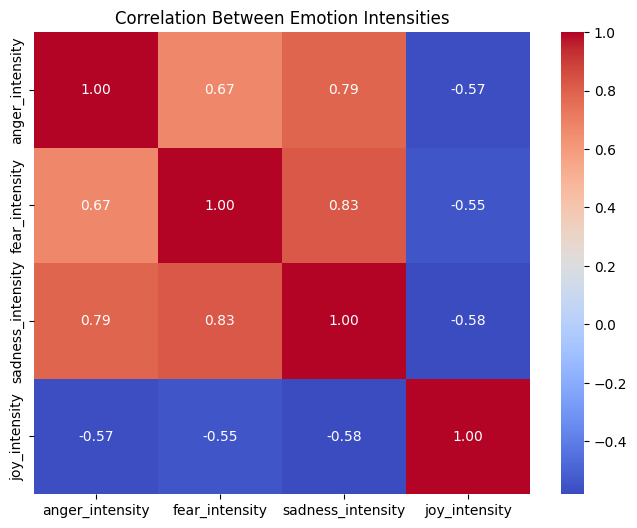

In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "tweetid_userid_keyword_topics_sentiments_emotions (5k sample).csv"
data = pd.read_csv(file_path)

# Extract relevant columns
emotion_intensity_cols = ['anger_intensity', 'fear_intensity', 'sadness_intensity', 'joy_intensity']

### **1. Overall Emotion Distribution (Pie Chart)**
emotion_counts = data['emotion_category'].value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

fig1 = px.pie(emotion_counts, names='Emotion', values='Count',
              title="Emotion Distribution in COVID-19 Tweets",
              color_discrete_sequence=px.colors.qualitative.Set3)
fig1.show()

### **2. Emotion Distribution (Bar Chart)**
fig2 = px.bar(emotion_counts, x='Emotion', y='Count', color='Emotion',
              title="Emotion Distribution in COVID-19 Tweets (Bar Chart)",
              labels={'Count': 'Tweet Count', 'Emotion': 'Emotion Type'})
fig2.show()

### **3. Average Emotion Intensity per Emotion Category**
emotion_avg = data.groupby("emotion_category")[emotion_intensity_cols].mean().reset_index()

fig3 = px.bar(emotion_avg.melt(id_vars="emotion_category"), x="emotion_category", y="value",
              color="variable", title="Average Emotion Intensity per Emotion",
              labels={"emotion_category": "Emotion", "value": "Average Intensity", "variable": "Emotion Type"},
              barmode="group")
fig3.show()

### **4. Heatmap of Emotion Intensity Correlations**
plt.figure(figsize=(8, 6))
sns.heatmap(data[emotion_intensity_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Emotion Intensities")
plt.show()

### **5. Boxplot of Emotion Intensities**
melted_intensity = data.melt(value_vars=emotion_intensity_cols, var_name='Emotion', value_name='Intensity')

fig4 = px.box(melted_intensity, x='Emotion', y='Intensity', color='Emotion',
              title="Distribution of Emotion Intensities",
              labels={'Intensity': 'Emotion Intensity', 'Emotion': 'Emotion Type'})
fig4.show()